In [3]:
import json
import pandas as pd

In [9]:
# Caricamento del file JSON
file_path="Mappa-dei-pub-circoli-locali-in-Italia.json"
with open(file_path, 'r', encoding='latin1') as f:
    data = json.load(f)

In [13]:
df=pd.DataFrame(data)

In [23]:
# Visualizzare le colonne disponibili
df.columns.tolist()

['ccomune',
 'cprovincia',
 'cregione',
 'cnome',
 'canno_inserimento',
 'cdata_e_ora_inserimento',
 'cidentificatore_in_openstreetmap',
 'clongitudine',
 'clatitudine']

In [30]:
#quanti dati ci sono in totale?
tot_dati=df.shape
print(f"il numero totale dei dati è pari a:{tot_dati}")

il numero totale dei dati è pari a:(2497, 9)


In [32]:
#quali sono i metadati?
metadati=df.dtypes
print("i metadati presenti nel database sono i seguenti:")
print(metadati)

i metadati presenti nel database sono i seguenti:
ccomune                             object
cprovincia                          object
cregione                            object
cnome                               object
canno_inserimento                   object
cdata_e_ora_inserimento             object
cidentificatore_in_openstreetmap    object
clongitudine                        object
clatitudine                         object
dtype: object


In [34]:
#stampiamo il primo elemento
print(df.iloc[0])

ccomune                                            ALTRO
cprovincia                                         ALTRO
cregione                                           ALTRO
cnome                                                   
canno_inserimento                                   2011
cdata_e_ora_inserimento             2011-06-25T23:17:43Z
cidentificatore_in_openstreetmap              1339088150
clongitudine                                   13.733257
clatitudine                                   45.5758303
Name: 0, dtype: object


In [39]:
#stampiamo l'ultimo elemento
print(df.iloc[-1])

ccomune                                        Trani (BT)
cprovincia                          BARLETTA ANDRIA TRANI
cregione                                           Puglia
cnome                                        Well's Fargo
canno_inserimento                                    2009
cdata_e_ora_inserimento              2009-08-10T12:44:03Z
cidentificatore_in_openstreetmap                387223648
clongitudine                                   16.4367655
clatitudine                                    41.2672644
Name: 2496, dtype: object


In [41]:
#riusciamo a stampare un elemento a caso?
print(df.sample(1))

    ccomune cprovincia   cregione      cnome canno_inserimento  \
679   Ghedi    BRESCIA  Lombardia  Roadhouse              2013   

    cdata_e_ora_inserimento cidentificatore_in_openstreetmap  \
679    2013-10-16T16:43:46Z                       2008128591   

         clongitudine       clatitudine  
679  10.3021233999999  45.4011710999999  


In [48]:
#quali sono gli anni di inserimento presenti?
anni=df["canno_inserimento"].unique()
print("gni anni di inserimento presenti sono i seguenti:")
print(anni)

gni anni di inserimento presenti sono i seguenti:
['2011' '2015' '2010' '2012' '2014' '2016' '2013' '2008' '2009' '2007']


In [65]:
#quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?
df['clongitudine'] = pd.to_numeric(df['clongitudine'], errors='coerce')
df['clatitudine'] = pd.to_numeric(df['clatitudine'], errors='coerce')
attività=df[(df["clongitudine"]>=9) & (df["clongitudine"]<=10) & (df["clatitudine"]>=45) & (df["clatitudine"]<=46)].shape[0]
print(attività)

303


In [70]:
#quante attività ci sono nella provincia di Vicenza?
attivita_vicenza = df[df['cprovincia'] == 'VI'].shape[0]
print(f"Numero di attività nella provincia di Vicenza: {attivita_vicenza}")

Numero di attività nella provincia di Vicenza: 0


In [83]:
#Quante enoteche ci sono, e come si chiamano?
enoteche = df[df['cnome'].str.contains('enoteca', case=False, na=False)]
numero_enoteche=enoteche.shape[0]
nomi_enoteche = enoteche['cnome'].tolist()
print(f"Numero di enoteche: {numero_enoteche}")
print("Nomi delle enoteche:")
print(nomi_enoteche)

Numero di enoteche: 6
Nomi delle enoteche:
['Enoteca con Cucina""Tirolin""', 'Concordia Enoteca', 'Enoteca Umberto', 'Enoteca ""Al Brindisi""', 'Enoteca ""da Massimo""', 'Enoteca Il Violino Rosso']


In [87]:
#Quante attività ci sono in Lazio e Abruzzo assieme?
attivita_lazio_abruzzo = df[df['cregione'].isin(['Lazio', 'Abruzzo'])].shape[0]
print(f"Numero di attività in Lazio e Abruzzo assieme: {attivita_lazio_abruzzo}")

Numero di attività in Lazio e Abruzzo assieme: 237


In [90]:
import pandas as pd

In [96]:
# Caricamento del file CSV
file_path = r'C:\Users\Leo\Desktop\EPICODE\3_PYTHON\W14D05\beginner_datasets\insurance.csv'
insurance_data = pd.read_csv(file_path)

In [102]:
# Visualizzazione delle dimensioni del dataset, un'anteprima e i nomi delle colonne
dimensions = insurance_data.shape
preview = insurance_data.head()
column_names = insurance_data.columns
print(dimensions)
print(preview)
print(column_names)

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [105]:
# Medie di charges rispetto a region
region_means = insurance_data.groupby('region')['charges'].mean()
region_means

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [109]:
# Medie di charges rispetto a smoker
smoker_means = insurance_data.groupby('smoker')['charges'].mean()
smoker_means

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [112]:
# Calcolo dei descrittori statistici di bmi
bmi_descriptive_stats = insurance_data['bmi'].describe()

In [115]:
# Calcolo dei quartili di bmi
bmi_quartiles = pd.qcut(insurance_data['bmi'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [118]:
# Aggiunta dei quartili al dataframe
insurance_data['bmi_quartile'] = bmi_quartiles

In [121]:
# Calcolo del minimo, media e massimo di charges rispetto ai quartili di bmi
charges_by_bmi_quartile = insurance_data.groupby('bmi_quartile')['charges'].agg(['min', 'mean', 'max'])

bmi_descriptive_stats, charges_by_bmi_quartile

C:\Users\Leo\AppData\Local\Temp\ipykernel_12080\2275491338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_by_bmi_quartile = insurance_data.groupby('bmi_quartile')['charges'].agg(['min', 'mean', 'max'])


(count    1338.000000
 mean       30.663397
 std         6.098187
 min        15.960000
 25%        26.296250
 50%        30.400000
 75%        34.693750
 max        53.130000
 Name: bmi, dtype: float64,
                     min          mean          max
 bmi_quartile                                      
 Q1            1121.8739  10360.662825  38245.59327
 Q2            1131.5066  11407.831468  62592.87309
 Q3            1135.9407  14358.173081  60021.39897
 Q4            1141.4451  16987.936691  63770.42801)

In [124]:
import pandas as pd

In [127]:
file_path = r'C:\Users\Leo\Desktop\EPICODE\3_PYTHON\W14D05\beginner_datasets\iris.csv'
iris_data = pd.read_csv(file_path)

In [130]:
# Visualizziamo un'anteprima del dataset
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [133]:
# Calcoliamo la media della lunghezza dei petali di tutto il dataset
mean_petal_length = iris_data['petal_length'].mean()
print(f"Media della lunghezza dei petali: {mean_petal_length}")

Media della lunghezza dei petali: 3.758666666666666


In [136]:
# Calcoliamo la media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
mean_petal_length_by_species = iris_data.groupby('species')['petal_length'].mean()
print("Media della lunghezza dei petali per specie:")
print(mean_petal_length_by_species)

Media della lunghezza dei petali per specie:
species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64


In [139]:
# Calcoliamo media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
sepal_width_stats_by_species = iris_data.groupby('species')['sepal_width'].agg(['mean', 'min', 'max'])
print("Media, minimo e massimo della larghezza dei sepali per specie:")
print(sepal_width_stats_by_species)

Media, minimo e massimo della larghezza dei sepali per specie:
                  mean  min  max
species                         
Iris-setosa      3.418  2.3  4.4
Iris-versicolor  2.770  2.0  3.4
Iris-virginica   2.974  2.2  3.8


In [142]:
import pandas as pd

In [145]:
# Caricamento del file CSV
file_path = r'C:\Users\Leo\Desktop\EPICODE\3_PYTHON\W14D05\beginner_datasets\wine.csv'
wine_data = pd.read_csv(file_path)

In [148]:
# Visualizziamo un'anteprima del dataset
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [151]:
# Calcoliamo la media di concentrazione alcolica per ogni qualità
mean_alcohol_by_quality = wine_data.groupby('quality')['alcohol'].mean()
print("Media di concentrazione alcolica per ogni qualità:")
print(mean_alcohol_by_quality)

Media di concentrazione alcolica per ogni qualità:
quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64


In [154]:
# Calcoliamo la media totale di concentrazione alcolica
mean_alcohol_total = wine_data['alcohol'].mean()
print(f"Media totale di concentrazione alcolica: {mean_alcohol_total}")

Media totale di concentrazione alcolica: 10.491800831149453


In [162]:
# Confrontiamo la concentrazione alcolica tra vini bianchi e vini rossi
mean_alcohol_by_color = wine_data.groupby('type')['alcohol'].mean()
print("Media di concentrazione alcolica per colore:")
print(mean_alcohol_by_color)

Media di concentrazione alcolica per colore:
type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


In [165]:
# Calcoliamo la media, minimo e massimo del pH per ogni qualità
mean_ph_by_quality = wine_data.groupby('quality')['pH'].mean()
print("Media del pH per ogni qualità:")
print(mean_ph_by_quality)

Media del pH per ogni qualità:
quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64


In [168]:
# Confrontiamo il pH tra vini bianchi e vini rossi
mean_ph_by_color = wine_data.groupby('type')['pH'].mean()
print("Media del pH per colore:")
print(mean_ph_by_color)

Media del pH per colore:
type
red      3.311113
white    3.188267
Name: pH, dtype: float64


In [193]:
# Calcoliamo la media, minimo e massimo dei solfati per ogni qualità
meanmaxmin_sulfates_by_quality = wine_data.groupby('quality')['sulphates'].agg(["mean","max","min"])
print("Media,max e min dei solfati per ogni qualità:")
print(meanmaxmin_sulfates_by_quality)

Media,max e min dei solfati per ogni qualità:
             mean   max   min
quality                      
3        0.506333  0.86  0.28
4        0.505648  2.00  0.25
5        0.526403  1.98  0.27
6        0.532549  1.95  0.23
7        0.547025  1.36  0.22
8        0.512487  1.10  0.25
9        0.466000  0.61  0.36


In [200]:
# Confrontiamo i solfati tra vini bianchi e vini rossi
meanmaxmin_sulfates_by_color = wine_data.groupby('type')['sulphates'].agg(["mean","max","min"])
print("Media,max e min dei solfati per colore:")
print(meanmaxmin_sulfates_by_color)

Media,max e min dei solfati per colore:
           mean   max   min
type                       
red    0.658149  2.00  0.33
white  0.489847  1.08  0.22


In [208]:
# Visualizziamo le prime righe del dataset per capire la sua struttura
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [211]:
# Esercizio 3/3: Analizziamo le domande

In [234]:
# 1. La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
mean_prices_by_river = boston.groupby("chas")['medv'].mean()
print("Media del prezzo delle case a seconda della distanza dal fiume Charles:")
print(mean_prices_by_river)

Media del prezzo delle case a seconda della distanza dal fiume Charles:
chas
0    22.093843
1    28.440000
Name: medv, dtype: float64


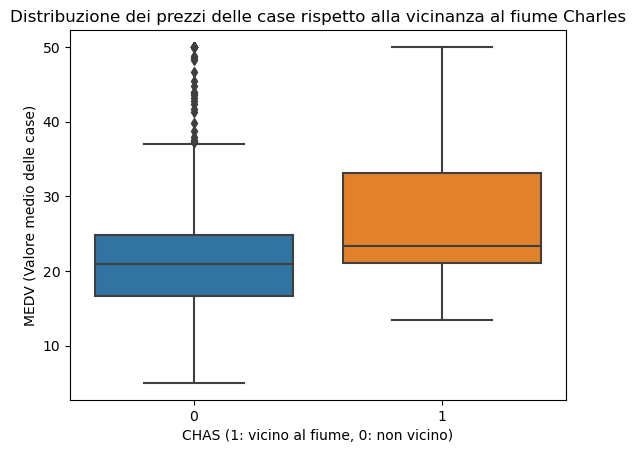

In [232]:
# Visualizzazione
sns.boxplot(x='chas', y='medv', data=boston)
plt.title('Distribuzione dei prezzi delle case rispetto alla vicinanza al fiume Charles')
plt.xlabel('CHAS (1: vicino al fiume, 0: non vicino)')
plt.ylabel('MEDV (Valore medio delle case)')
plt.show()

In [222]:
# 2. Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni?
correlation_crim_medv = boston['crim'].corr(boston['medv'])
print("Correlazione tra tasso di criminalità e valore delle abitazioni:")
print(correlation_crim_medv)

Correlazione tra tasso di criminalità e valore delle abitazioni:
-0.3883046085868114


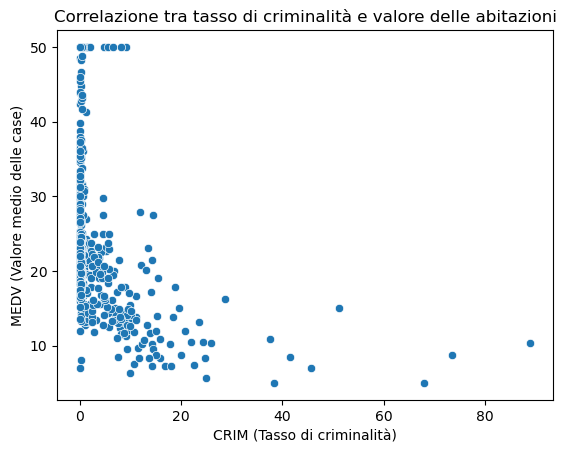

In [227]:
# Visualizzazione
sns.scatterplot(x='crim', y='medv', data=boston)
plt.title('Correlazione tra tasso di criminalità e valore delle abitazioni')
plt.xlabel('CRIM (Tasso di criminalità)')
plt.ylabel('MEDV (Valore medio delle case)')
plt.show()


In [237]:
# 3. Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? 
# Appare esserci una qualche correlazione? Come si può spiegare il risultato?
mean_rooms_by_ptratio = boston.groupby('ptratio')['rm'].mean()
mean_values_by_ptratio = boston.groupby('ptratio')['medv'].mean()
print("Media del numero di stanze rispetto al rapporto alunni-insegnanti:")
print(mean_rooms_by_ptratio)
print("Media del valore delle case rispetto al rapporto alunni-insegnanti:")
print(mean_values_by_ptratio)

Media del numero di stanze rispetto al rapporto alunni-insegnanti:
ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64
Media del valore delle case rispetto al rapporto alunni-insegnanti:
ptratio
12.6    32.733333
13.0    38.025000
13.6  

In [240]:
# Correlazione tra RM e PTRATIO
correlation_rm_ptratio = boston['rm'].corr(boston['ptratio'])
print("Correlazione tra numero di stanze e rapporto alunni-insegnanti:")
print(correlation_rm_ptratio)

Correlazione tra numero di stanze e rapporto alunni-insegnanti:
-0.3555014945590854


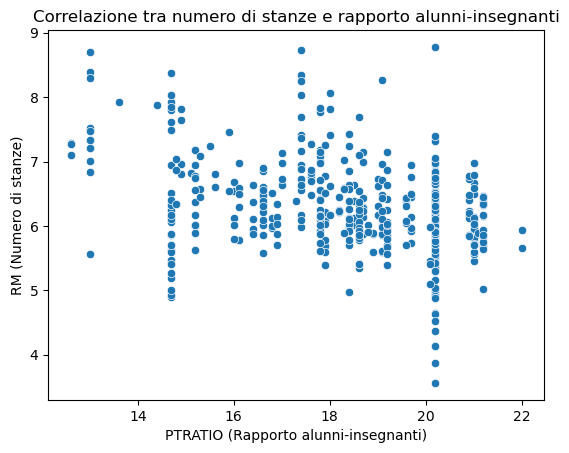

In [250]:
sns.scatterplot(x='ptratio', y='rm', data=boston)
plt.title('Correlazione tra numero di stanze e rapporto alunni-insegnanti')
plt.xlabel('PTRATIO (Rapporto alunni-insegnanti)')
plt.ylabel('RM (Numero di stanze)')
plt.show()

In [243]:
# Correlazione tra MEDV e PTRATIO
correlation_medv_ptratio = boston['medv'].corr(boston['ptratio'])
print("Correlazione tra valore delle case e rapporto alunni-insegnanti:")
print(correlation_medv_ptratio)

Correlazione tra valore delle case e rapporto alunni-insegnanti:
-0.5077866855375615


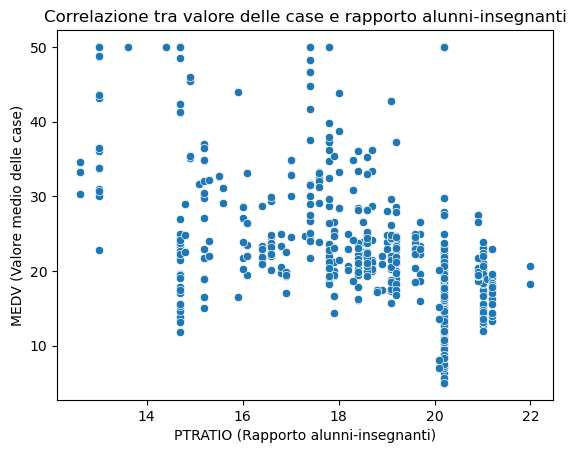

In [252]:
# Visualizzazione
sns.scatterplot(x='ptratio', y='medv', data=boston)
plt.title('Correlazione tra valore delle case e rapporto alunni-insegnanti')
plt.xlabel('PTRATIO (Rapporto alunni-insegnanti)')
plt.ylabel('MEDV (Valore medio delle case)')
plt.show()

In [255]:
# 4. Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?
mean_age_by_rad = boston.groupby('rad')['age'].mean()
mean_rooms_by_rad = boston.groupby('rad')['rm'].mean()
mean_tax_by_rad = boston.groupby('rad')['tax'].mean()
print("Media dell'età delle abitazioni rispetto all'accessibilità alle autostrade:")
print(mean_age_by_rad)
print("Media del numero di stanze rispetto all'accessibilità alle autostrade:")
print(mean_rooms_by_rad)
print("Media delle tasse rispetto all'accessibilità alle autostrade:")
print(mean_tax_by_rad)

Media dell'età delle abitazioni rispetto all'accessibilità alle autostrade:
rad
1     45.025000
2     64.770833
3     49.310526
4     60.841818
5     69.223478
6     60.142308
7     40.141176
8     67.350000
24    89.805303
Name: age, dtype: float64
Media del numero di stanze rispetto all'accessibilità alle autostrade:
rad
1     6.555850
2     6.649958
3     6.473026
4     6.133118
5     6.393157
6     6.104731
7     6.647765
8     6.950792
24    6.022152
Name: rm, dtype: float64
Media delle tasse rispetto all'accessibilità alle autostrade:
rad
1     291.450000
2     260.666667
3     246.078947
4     335.981818
5     331.843478
6     372.884615
7     304.411765
8     301.250000
24    666.000000
Name: tax, dtype: float64


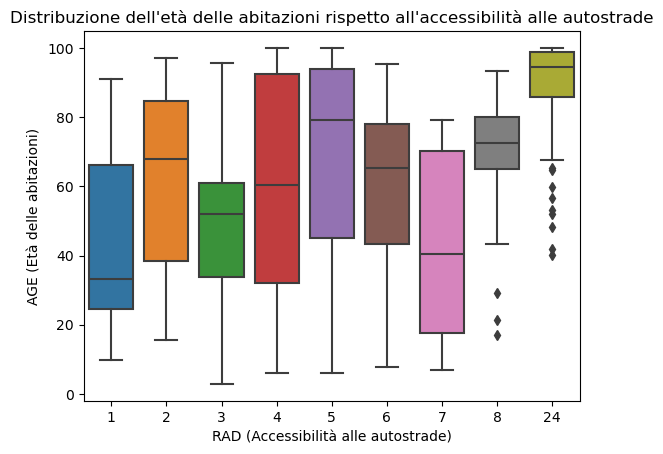

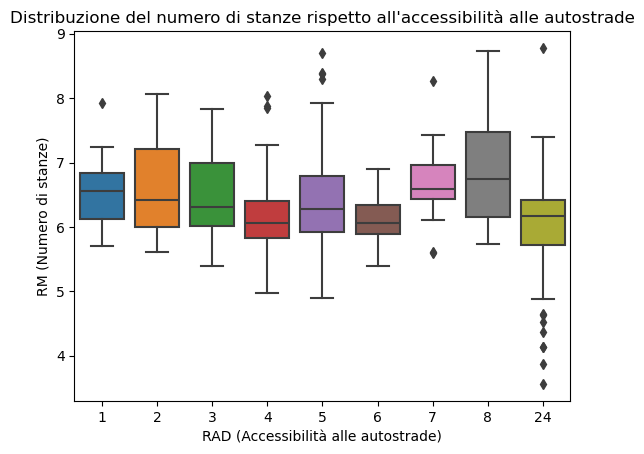

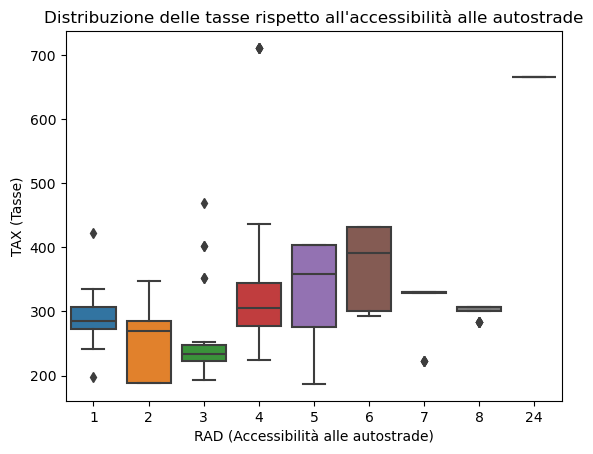

In [261]:
# Visualizzazione
sns.boxplot(x='rad', y='age', data=boston)
plt.title('Distribuzione dell\'età delle abitazioni rispetto all\'accessibilità alle autostrade')
plt.xlabel('RAD (Accessibilità alle autostrade)')
plt.ylabel('AGE (Età delle abitazioni)')
plt.show()

sns.boxplot(x='rad', y='rm', data=boston)
plt.title('Distribuzione del numero di stanze rispetto all\'accessibilità alle autostrade')
plt.xlabel('RAD (Accessibilità alle autostrade)')
plt.ylabel('RM (Numero di stanze)')
plt.show()

sns.boxplot(x='rad', y='tax', data=boston)
plt.title('Distribuzione delle tasse rispetto all\'accessibilità alle autostrade')
plt.xlabel('RAD (Accessibilità alle autostrade)')
plt.ylabel('TAX (Tasse)')
plt.show()

In [264]:
import pandas as pd

In [273]:
# Esercizio 1/3: Creazione del DataFrame dei dipendenti
employees_df = pd.DataFrame({'employee_id': [101, 102, 103, 104, 105],'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],'department_id': [1, 2, 1, 2, 3]})

In [276]:
# Esercizio 2/3: Creazione del DataFrame dei dipartimenti
departments_df = pd.DataFrame({'department_id': [1, 2, 3],'department_name': ['HR', 'IT', 'Finance'],'location': ['New York', 'San Francisco', 'Chicago']})

In [279]:
# Esercizio 3/3: Unione dei DataFrame utilizzando il metodo .merge()
merged_df = pd.merge(left=employees_df,right=departments_df, on='department_id')
print("DataFrame unito con .merge():")
print(merged_df)

DataFrame unito con .merge():
   employee_id     name  department_id department_name       location
0          101    Alice              1              HR       New York
1          103  Charlie              1              HR       New York
2          102      Bob              2              IT  San Francisco
3          104    David              2              IT  San Francisco
4          105     Emma              3         Finance        Chicago


In [284]:
# Trasformare la colonna 'department_id' in indice in modo permanente
employees_df.set_index('department_id', inplace=True)
departments_df.set_index('department_id', inplace=True)

In [287]:
# Unione dei DataFrame utilizzando il metodo .join()
joined_df = employees_df.join(departments_df, on='department_id')
print("\nDataFrame unito con .join():")
print(joined_df)


DataFrame unito con .join():
               employee_id     name department_name       location
department_id                                                     
1                      101    Alice              HR       New York
2                      102      Bob              IT  San Francisco
1                      103  Charlie              HR       New York
2                      104    David              IT  San Francisco
3                      105     Emma         Finance        Chicago


In [290]:
# Differenze tra i risultati
print("\nDifferenze tra i risultati:")
print("La fusione con .merge() crea un DataFrame che mantiene 'department_id' come colonna.")
print("La fusione con .join() crea un DataFrame con 'department_id' come indice.")


Differenze tra i risultati:
La fusione con .merge() crea un DataFrame che mantiene 'department_id' come colonna.
La fusione con .join() crea un DataFrame con 'department_id' come indice.
